# Setup and Initial EDA

        This notebook initializes the environment and performs a quick exploratory look at the BRFSS 2015 diabetes datasets.

In [43]:
# [imports]
import os
from pathlib import Path

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
%matplotlib inline

In [44]:
# Resolve data directory robustly regardless of current working directory
CWD = Path.cwd().resolve()
CANDIDATES = [CWD / "data", CWD.parent / "data", CWD.parent.parent / "data"]
DATA_DIR = next((p for p in CANDIDATES if (p.exists() and p.is_dir())), CANDIDATES[0])

FILES = {
    "multi": DATA_DIR / "diabetes_012_health_indicators_BRFSS2015.csv",
    "binary_full": DATA_DIR / "diabetes_binary_health_indicators_BRFSS2015.csv",
    "binary_balanced": DATA_DIR / "diabetes_binary_5050split_health_indicators_BRFSS2015.csv",
}

for name, p in FILES.items():
    print(f"{name}: exists={p.exists()} -> {p}")

multi: exists=True -> /Users/blakelawall/Desktop/SDS/SDS-CP035-gluco-track/advanced/submissions/team-members/blake-lawall/data/diabetes_012_health_indicators_BRFSS2015.csv
binary_full: exists=True -> /Users/blakelawall/Desktop/SDS/SDS-CP035-gluco-track/advanced/submissions/team-members/blake-lawall/data/diabetes_binary_health_indicators_BRFSS2015.csv
binary_balanced: exists=True -> /Users/blakelawall/Desktop/SDS/SDS-CP035-gluco-track/advanced/submissions/team-members/blake-lawall/data/diabetes_binary_5050split_health_indicators_BRFSS2015.csv


In [45]:
# Load a default dataset for quick inspection
default_key = "binary_full" if FILES["binary_full"].exists() else ("binary_balanced" if FILES["binary_balanced"].exists() else "multi")
df = pd.read_csv(FILES[default_key])
print(f"Loaded: {default_key} -> {FILES[default_key]}")
df.head()

Loaded: binary_full -> /Users/blakelawall/Desktop/SDS/SDS-CP035-gluco-track/advanced/submissions/team-members/blake-lawall/data/diabetes_binary_health_indicators_BRFSS2015.csv


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [46]:
# Basic info and summary statistics
display(df.info())
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

None

,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,253680.0,0.139333,0.346294,0.0,0.0,0.0,0.0,1.0
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0


Target column: Diabetes_binary


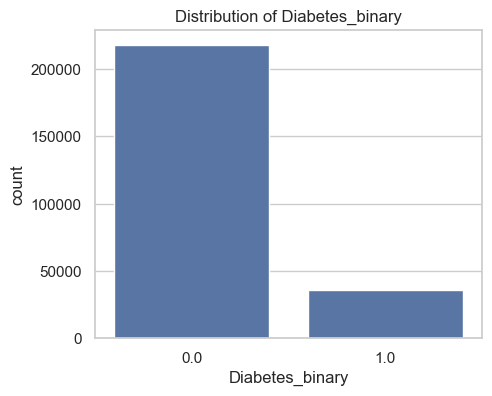

In [47]:
# Try to infer a target column and show its distribution
candidate_targets = ["Diabetes_binary", "Diabetes_012", "Outcome", "diabetes"]
target_col = next((c for c in candidate_targets if c in df.columns), None)
print("Target column:", target_col)
if target_col is not None:
    plt.figure(figsize=(5, 4))
    ax = sns.countplot(data=df, x=target_col)
    ax.set_title(f"Distribution of {target_col}")
    plt.show()
else:
    print("No known target column found in columns:", list(df.columns)[:10], "...")

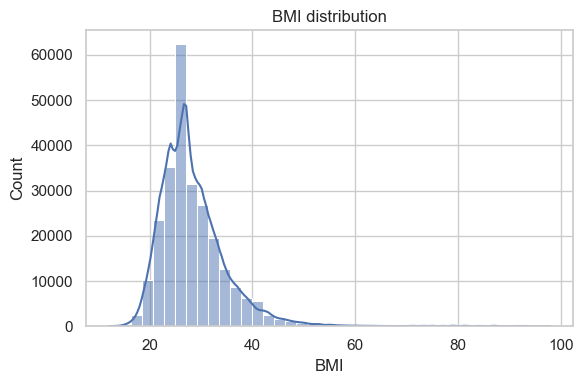

In [48]:
# Quick look at BMI if available
if "BMI" in df.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df["BMI"], bins=40, kde=True)
    plt.title("BMI distribution")
    plt.xlabel("BMI")
    plt.tight_layout()
    plt.show()
else:
    print("Column 'BMI' not found.")

## 📦 1. Data Integrity & Structure

Let's check for missing values, duplicates, and data types.

In [49]:
# Check for missing values and duplicates
print("=== MISSING VALUES ===")
missing_counts = df.isnull().sum()
missing_pct = (missing_counts / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing %': missing_pct
}).sort_values('Missing Count', ascending=False)
print(missing_df[missing_df['Missing Count'] > 0])

print("\n=== DUPLICATES ===")
duplicates = df.duplicated().sum()
print(f"Duplicate rows: {duplicates} ({duplicates/len(df)*100:.2f}%)")

print("\n=== DATA TYPES ===")
print(df.dtypes.value_counts())

=== MISSING VALUES ===
Empty DataFrame
Columns: [Missing Count, Missing %]
Index: []

=== DUPLICATES ===
Duplicate rows: 24206 (9.54%)

=== DATA TYPES ===
float64    22
Name: count, dtype: int64


In [50]:
# Check data types and convert if needed
print("=== CURRENT DATA TYPES ===")
print(df.dtypes)

# Check for potential type issues
print("\n=== SAMPLE VALUES BY COLUMN ===")
for col in df.columns:
    print(f"{col}: {df[col].dtype} - Sample: {df[col].head(3).tolist()}")

# Check for constant or near-constant features
print("\n=== CONSTANT/NEAR-CONSTANT FEATURES ===")
constant_features = []
for col in df.columns:
    unique_ratio = df[col].nunique() / len(df)
    if unique_ratio < 0.01:  # Less than 1% unique values
        constant_features.append((col, unique_ratio, df[col].nunique()))
        print(f"{col}: {unique_ratio:.4f} unique ratio ({df[col].nunique()} unique values)")

if not constant_features:
    print("No constant or near-constant features found.")

=== CURRENT DATA TYPES ===
Diabetes_binary         float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

=== SAMPLE VALUES BY COLUMN ===
Diabetes_binary: float64 - Sample: [0.0, 0.0, 0.0]
HighBP: float64 - Sample: [1.0, 0.0, 1.0]
HighChol: float64 - Sample: [1.0, 0.0, 1.0]
CholCheck: float64 - Sample: [1.0, 0.0, 1.0]
BMI: float64 - Sample: [40.0, 25.0, 28.0

## 📊 Detailed Column Analysis

Let's analyze the data types and categorize columns properly.

In [51]:
# Detailed column analysis and categorization
print("=== DATASET INFO ===")
print(f"Shape: {df.shape}")
print(f"Total columns: {len(df.columns)}")

print("\n=== NUMERICAL COLUMNS (by storage type) ===")
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f"Count: {len(numerical_cols)}")
for col in numerical_cols:
    print(f"  - {col}: {df[col].dtype}")

print("\n=== CATEGORICAL COLUMNS (by storage type) ===")
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print(f"Count: {len(categorical_cols)}")
if categorical_cols:
    for col in categorical_cols:
        print(f"  - {col}: {df[col].dtype}")
else:
    print("  No categorical columns found")

print("\n=== COLUMN CATEGORIZATION BY CONTENT ===")

# Categorize columns by their actual content
continuous_numerical = []
binary_features = []
multi_categorical = []

for col in df.columns:
    unique_vals = sorted(df[col].unique())
    unique_count = len(unique_vals)
    
    if unique_count == 2 and all(val in [0, 1] for val in unique_vals):
        binary_features.append(col)
    elif unique_count <= 10 and unique_count > 2:
        multi_categorical.append((col, unique_count, unique_vals))
    elif unique_count > 10:
        continuous_numerical.append(col)

print("\n📈 CONTINUOUS NUMERICAL FEATURES:")
print(f"Count: {len(continuous_numerical)}")
for col in continuous_numerical:
    print(f"  - {col}: {df[col].dtype} (range: {df[col].min():.1f} to {df[col].max():.1f})")

print("\n🔘 BINARY FEATURES (0/1):")
print(f"Count: {len(binary_features)}")
for col in binary_features:
    print(f"  - {col}: {df[col].dtype}")

print("\n📋 MULTI-CLASS CATEGORICAL FEATURES:")
print(f"Count: {len(multi_categorical)}")
for col, unique_count, unique_vals in multi_categorical:
    print(f"  - {col}: {unique_count} categories {unique_vals}")

print("\n=== PREPROCESSING RECOMMENDATIONS ===")
print("\n🔧 Data Type Conversions:")
for col in binary_features:
    print(f"  - {col}: Convert to int8 or category")

print("\n🔧 Encoding Needed:")
for col, unique_count, unique_vals in multi_categorical:
    print(f"  - {col}: One-hot encode ({unique_count} categories)")

print("\n🔧 Scaling Needed:")
for col in continuous_numerical:
    print(f"  - {col}: StandardScaler or RobustScaler")

print("\n=== MEMORY OPTIMIZATION ===")
print("Current memory usage:")
print(f"  - Total: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Estimate memory after optimization
estimated_memory = 0
for col in df.columns:
    if col in binary_features:
        estimated_memory += len(df) * 1  # int8 = 1 byte
    elif col in [c[0] for c in multi_categorical]:
        estimated_memory += len(df) * 4  # float32 = 4 bytes
    else:
        estimated_memory += len(df) * 4  # float32 = 4 bytes

print(f"Estimated after optimization: {estimated_memory / 1024**2:.2f} MB")
print(f"Potential savings: {(df.memory_usage(deep=True).sum() - estimated_memory) / 1024**2:.2f} MB")

=== DATASET INFO ===
Shape: (253680, 22)
Total columns: 22

=== NUMERICAL COLUMNS (by storage type) ===
Count: 22
  - Diabetes_binary: float64
  - HighBP: float64
  - HighChol: float64
  - CholCheck: float64
  - BMI: float64
  - Smoker: float64
  - Stroke: float64
  - HeartDiseaseorAttack: float64
  - PhysActivity: float64
  - Fruits: float64
  - Veggies: float64
  - HvyAlcoholConsump: float64
  - AnyHealthcare: float64
  - NoDocbcCost: float64
  - GenHlth: float64
  - MentHlth: float64
  - PhysHlth: float64
  - DiffWalk: float64
  - Sex: float64
  - Age: float64
  - Education: float64
  - Income: float64

=== CATEGORICAL COLUMNS (by storage type) ===
Count: 0
  No categorical columns found

=== COLUMN CATEGORIZATION BY CONTENT ===

📈 CONTINUOUS NUMERICAL FEATURES:
Count: 4
  - BMI: float64 (range: 12.0 to 98.0)
  - MentHlth: float64 (range: 0.0 to 30.0)
  - PhysHlth: float64 (range: 0.0 to 30.0)
  - Age: float64 (range: 1.0 to 13.0)

🔘 BINARY FEATURES (0/1):
Count: 15
  - Diabetes_bin

## 🎯 2. Target Variable Assessment

Analyzing the distribution and balance of our target variable.

Target column: Diabetes_binary

=== TARGET DISTRIBUTION ===
Counts:
Diabetes_binary
0.0    218334
1.0     35346
Name: count, dtype: int64

Percentages:
Diabetes_binary
0.0    86.066698
1.0    13.933302
Name: proportion, dtype: float64


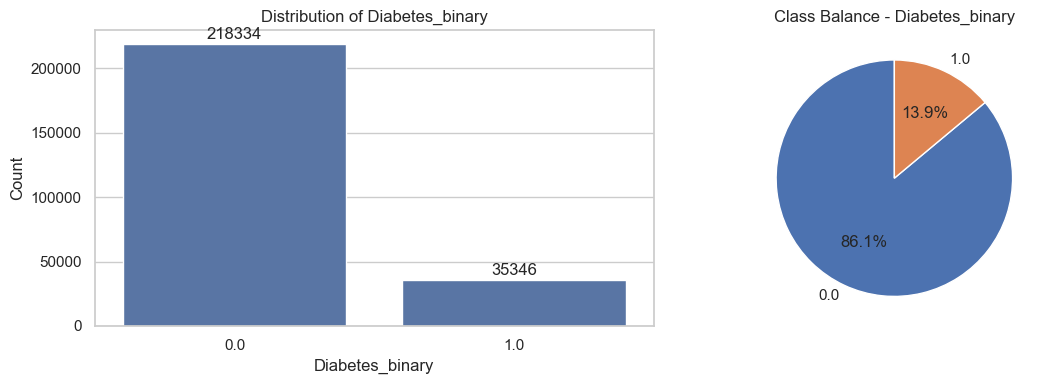


Class imbalance ratio: 6.18:1
⚠️  Significant class imbalance detected!


In [52]:
# Target variable analysis
target_col = next((c for c in ["Diabetes_binary", "Diabetes_012", "Outcome", "diabetes"] if c in df.columns), None)
print(f"Target column: {target_col}")

if target_col is not None:
    print("\n=== TARGET DISTRIBUTION ===")
    target_counts = df[target_col].value_counts()
    target_pct = df[target_col].value_counts(normalize=True) * 100
    
    print("Counts:")
    print(target_counts)
    print("\nPercentages:")
    print(target_pct)
    
    # Visualize target distribution
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    # Count plot
    sns.countplot(data=df, x=target_col, ax=ax1)
    ax1.set_title(f"Distribution of {target_col}")
    ax1.set_xlabel(target_col)
    ax1.set_ylabel("Count")
    
    # Add count labels on bars
    for i, v in enumerate(target_counts):
        ax1.text(i, v + max(target_counts) * 0.01, str(v), ha='center', va='bottom')
    
    # Pie chart
    ax2.pie(target_counts.values, labels=target_counts.index, autopct='%1.1f%%', startangle=90)
    ax2.set_title(f"Class Balance - {target_col}")
    
    plt.tight_layout()
    plt.show()
    
    # Class imbalance assessment
    imbalance_ratio = target_counts.max() / target_counts.min()
    print(f"\nClass imbalance ratio: {imbalance_ratio:.2f}:1")
    if imbalance_ratio > 2:
        print("⚠️  Significant class imbalance detected!")
    else:
        print("✅ Relatively balanced classes")

## 📊 3. Feature Distribution & Quality

Analyzing numerical features for skewness, outliers, and data quality.

In [53]:
# Analyze numerical features
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
if target_col in numerical_cols:
    numerical_cols.remove(target_col)

print(f"Numerical features: {numerical_cols}")

# Statistical summary
print("\n=== NUMERICAL FEATURES SUMMARY ===")
print(df[numerical_cols].describe())

# Check for outliers using IQR method
print("\n=== OUTLIER DETECTION (IQR Method) ===")
outlier_info = {}
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_count = len(outliers)
    outlier_pct = (outlier_count / len(df)) * 100
    
    outlier_info[col] = {
        'outliers': outlier_count,
        'outlier_pct': outlier_pct,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'min': df[col].min(),
        'max': df[col].max()
    }
    
    if outlier_count > 0:
        print(f"{col}: {outlier_count} outliers ({outlier_pct:.1f}%) - Range: [{lower_bound:.2f}, {upper_bound:.2f}]")

# Skewness analysis
print("\n=== SKEWNESS ANALYSIS ===")
skewness = df[numerical_cols].skew().sort_values(key=abs, ascending=False)
print(skewness)

Numerical features: ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']

=== NUMERICAL FEATURES SUMMARY ===
              HighBP       HighChol      CholCheck            BMI  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean        0.429001       0.424121       0.962670      28.382364   
std         0.494934       0.494210       0.189571       6.608694   
min         0.000000       0.000000       0.000000      12.000000   
25%         0.000000       0.000000       1.000000      24.000000   
50%         0.000000       0.000000       1.000000      27.000000   
75%         1.000000       1.000000       1.000000      31.000000   
max         1.000000       1.000000       1.000000      98.000000   

              Smoker         Stroke  HeartDiseaseorAttack   P

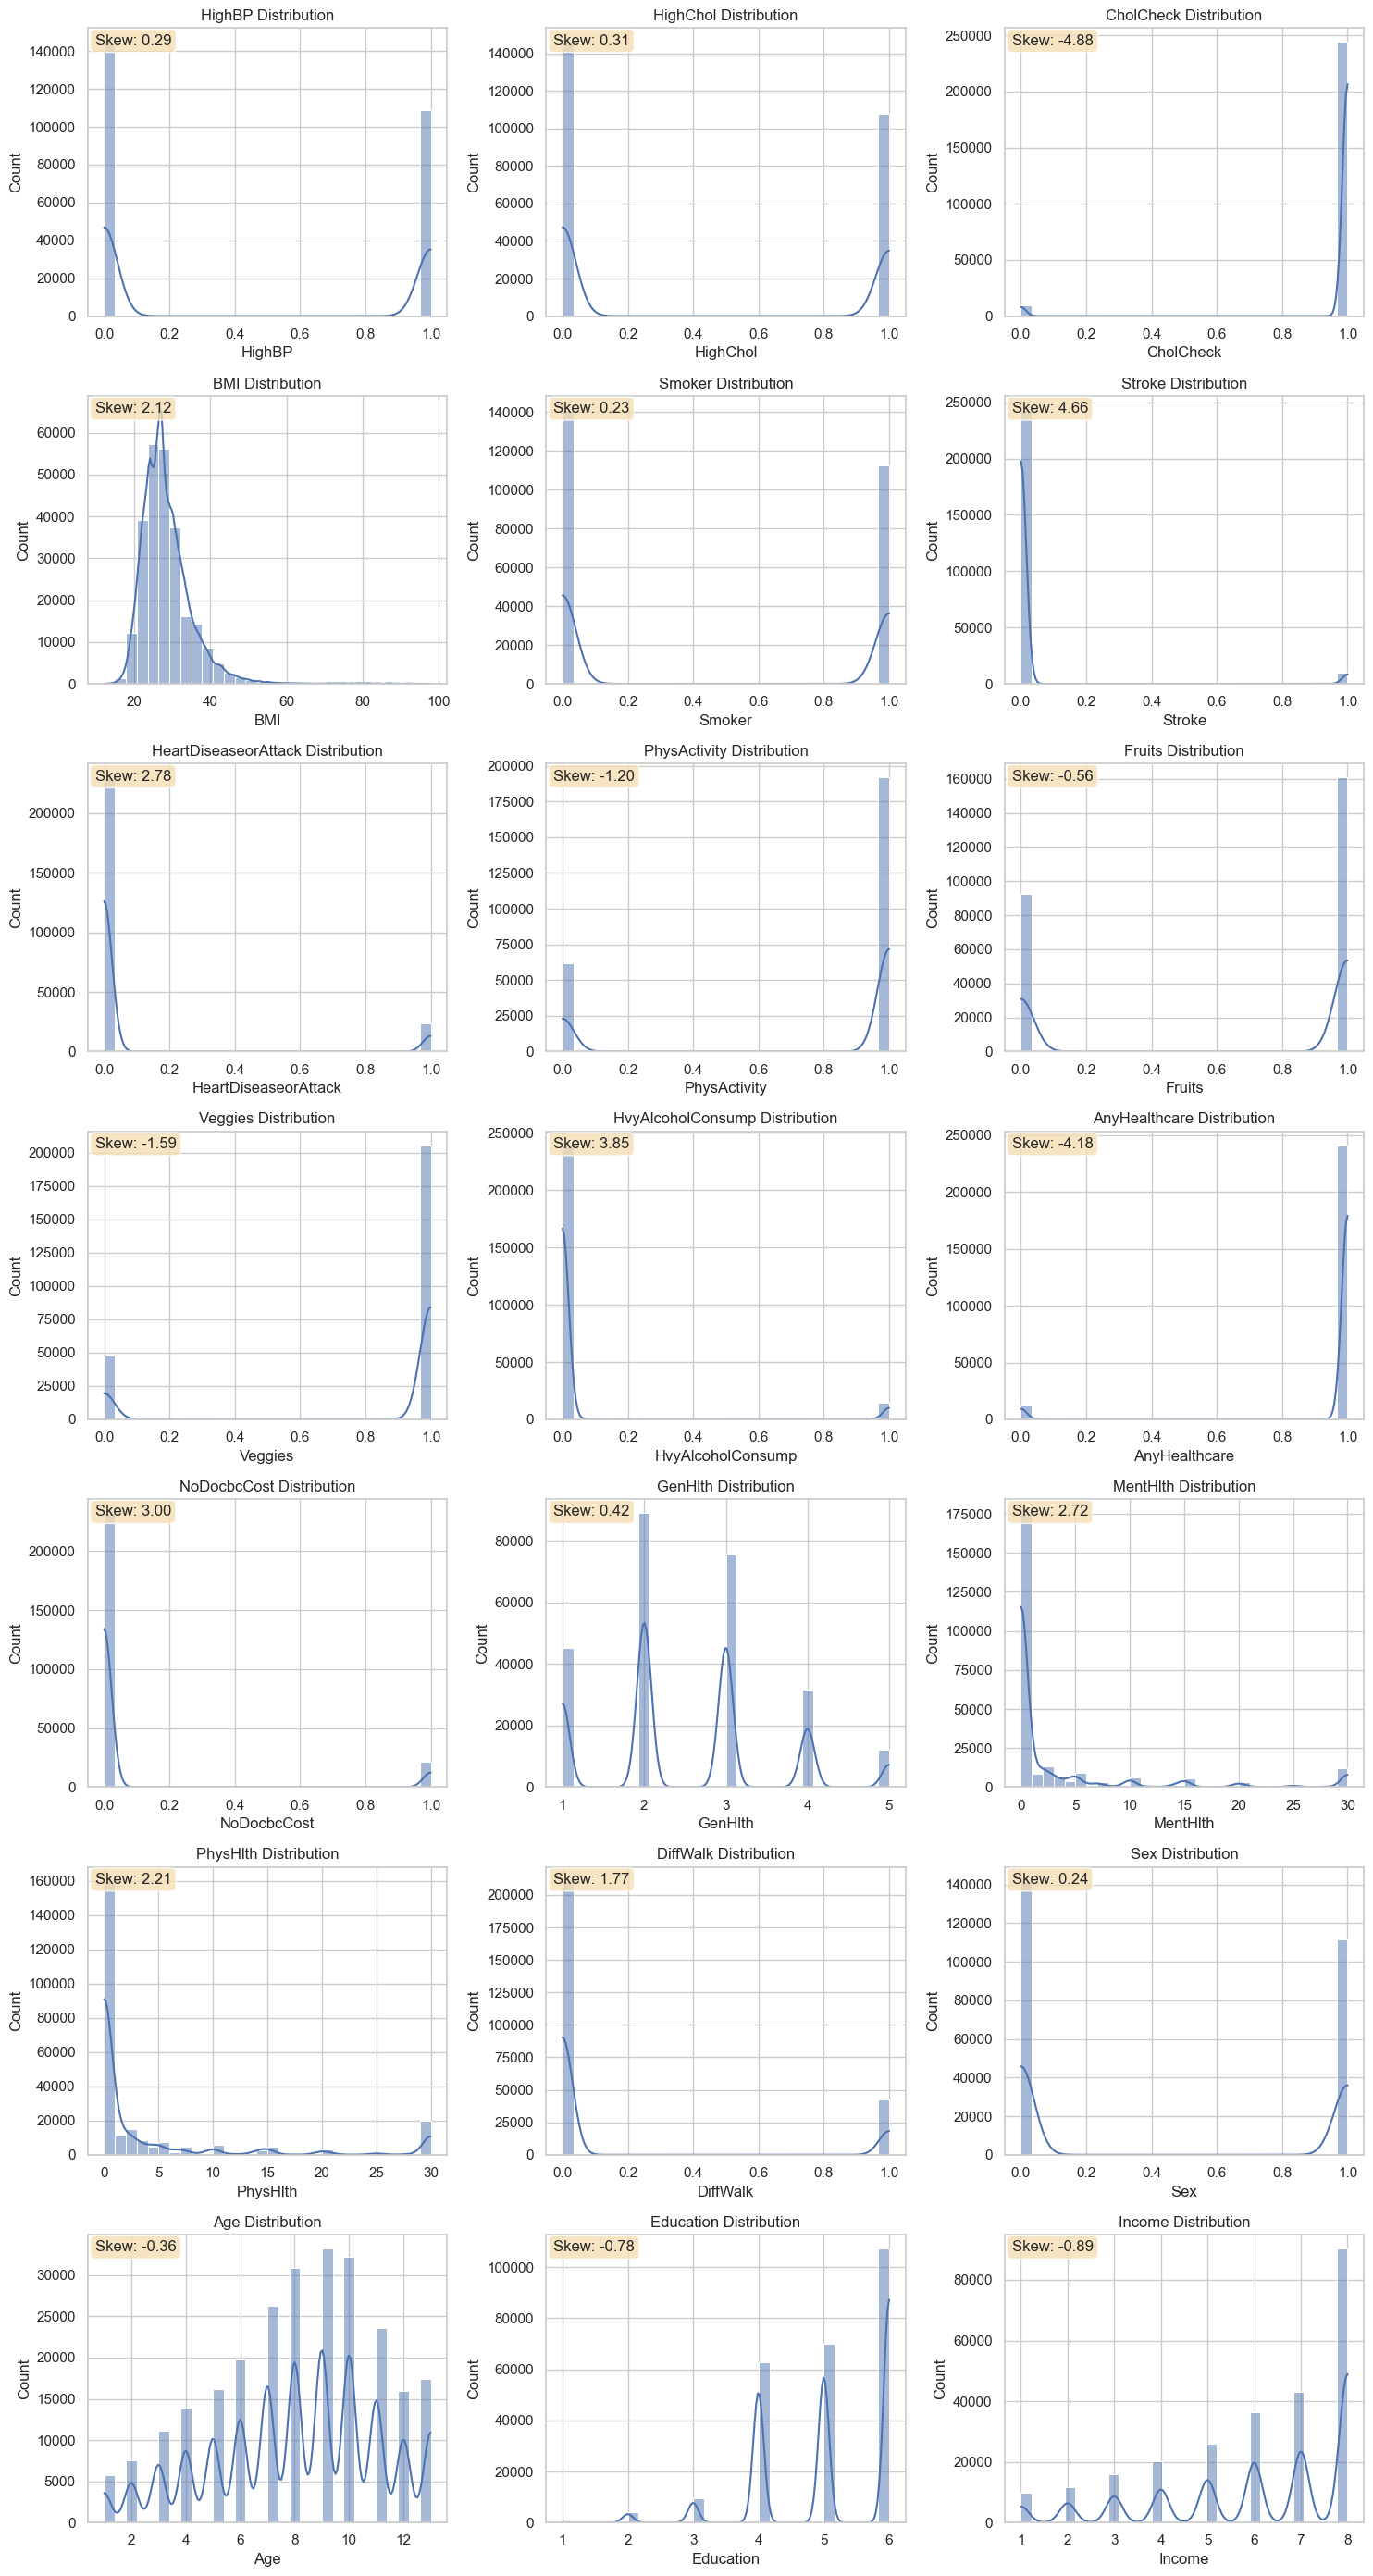

In [54]:
# Visualize numerical feature distributions
n_numerical = len(numerical_cols)
n_cols = 3
n_rows = (n_numerical + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))
if n_rows == 1:
    axes = axes.reshape(1, -1)

for i, col in enumerate(numerical_cols):
    row = i // n_cols
    col_idx = i % n_cols
    ax = axes[row, col_idx]
    
    # Histogram with KDE
    sns.histplot(df[col], kde=True, ax=ax, bins=30)
    ax.set_title(f"{col} Distribution")
    ax.set_xlabel(col)
    
    # Add skewness info
    skew_val = df[col].skew()
    ax.text(0.02, 0.98, f'Skew: {skew_val:.2f}', transform=ax.transAxes, 
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# Hide empty subplots
for i in range(n_numerical, n_rows * n_cols):
    row = i // n_cols
    col_idx = i % n_cols
    axes[row, col_idx].set_visible(False)

plt.tight_layout()
plt.show()

## 📈 4. Feature Relationships & Patterns

Analyzing categorical features and their relationships with the target variable.

In [55]:
# Analyze categorical features
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print(f"Categorical features: {categorical_cols}")

# For binary features stored as integers, also check
binary_cols = []
for col in df.columns:
    if col != target_col and df[col].nunique() <= 10:
        unique_vals = sorted(df[col].unique())
        if all(val in [0, 1] for val in unique_vals) or len(unique_vals) <= 5:
            binary_cols.append(col)

print(f"\nPotential binary/categorical features: {binary_cols}")

# Combine all categorical-like features
all_categorical = list(set(categorical_cols + binary_cols))
print(f"\nAll categorical-like features: {all_categorical}")

Categorical features: []

Potential binary/categorical features: ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'DiffWalk', 'Sex']

All categorical-like features: ['Sex', 'HighChol', 'NoDocbcCost', 'CholCheck', 'HvyAlcoholConsump', 'Veggies', 'PhysActivity', 'Smoker', 'Fruits', 'AnyHealthcare', 'DiffWalk', 'Stroke', 'HeartDiseaseorAttack', 'HighBP', 'GenHlth']


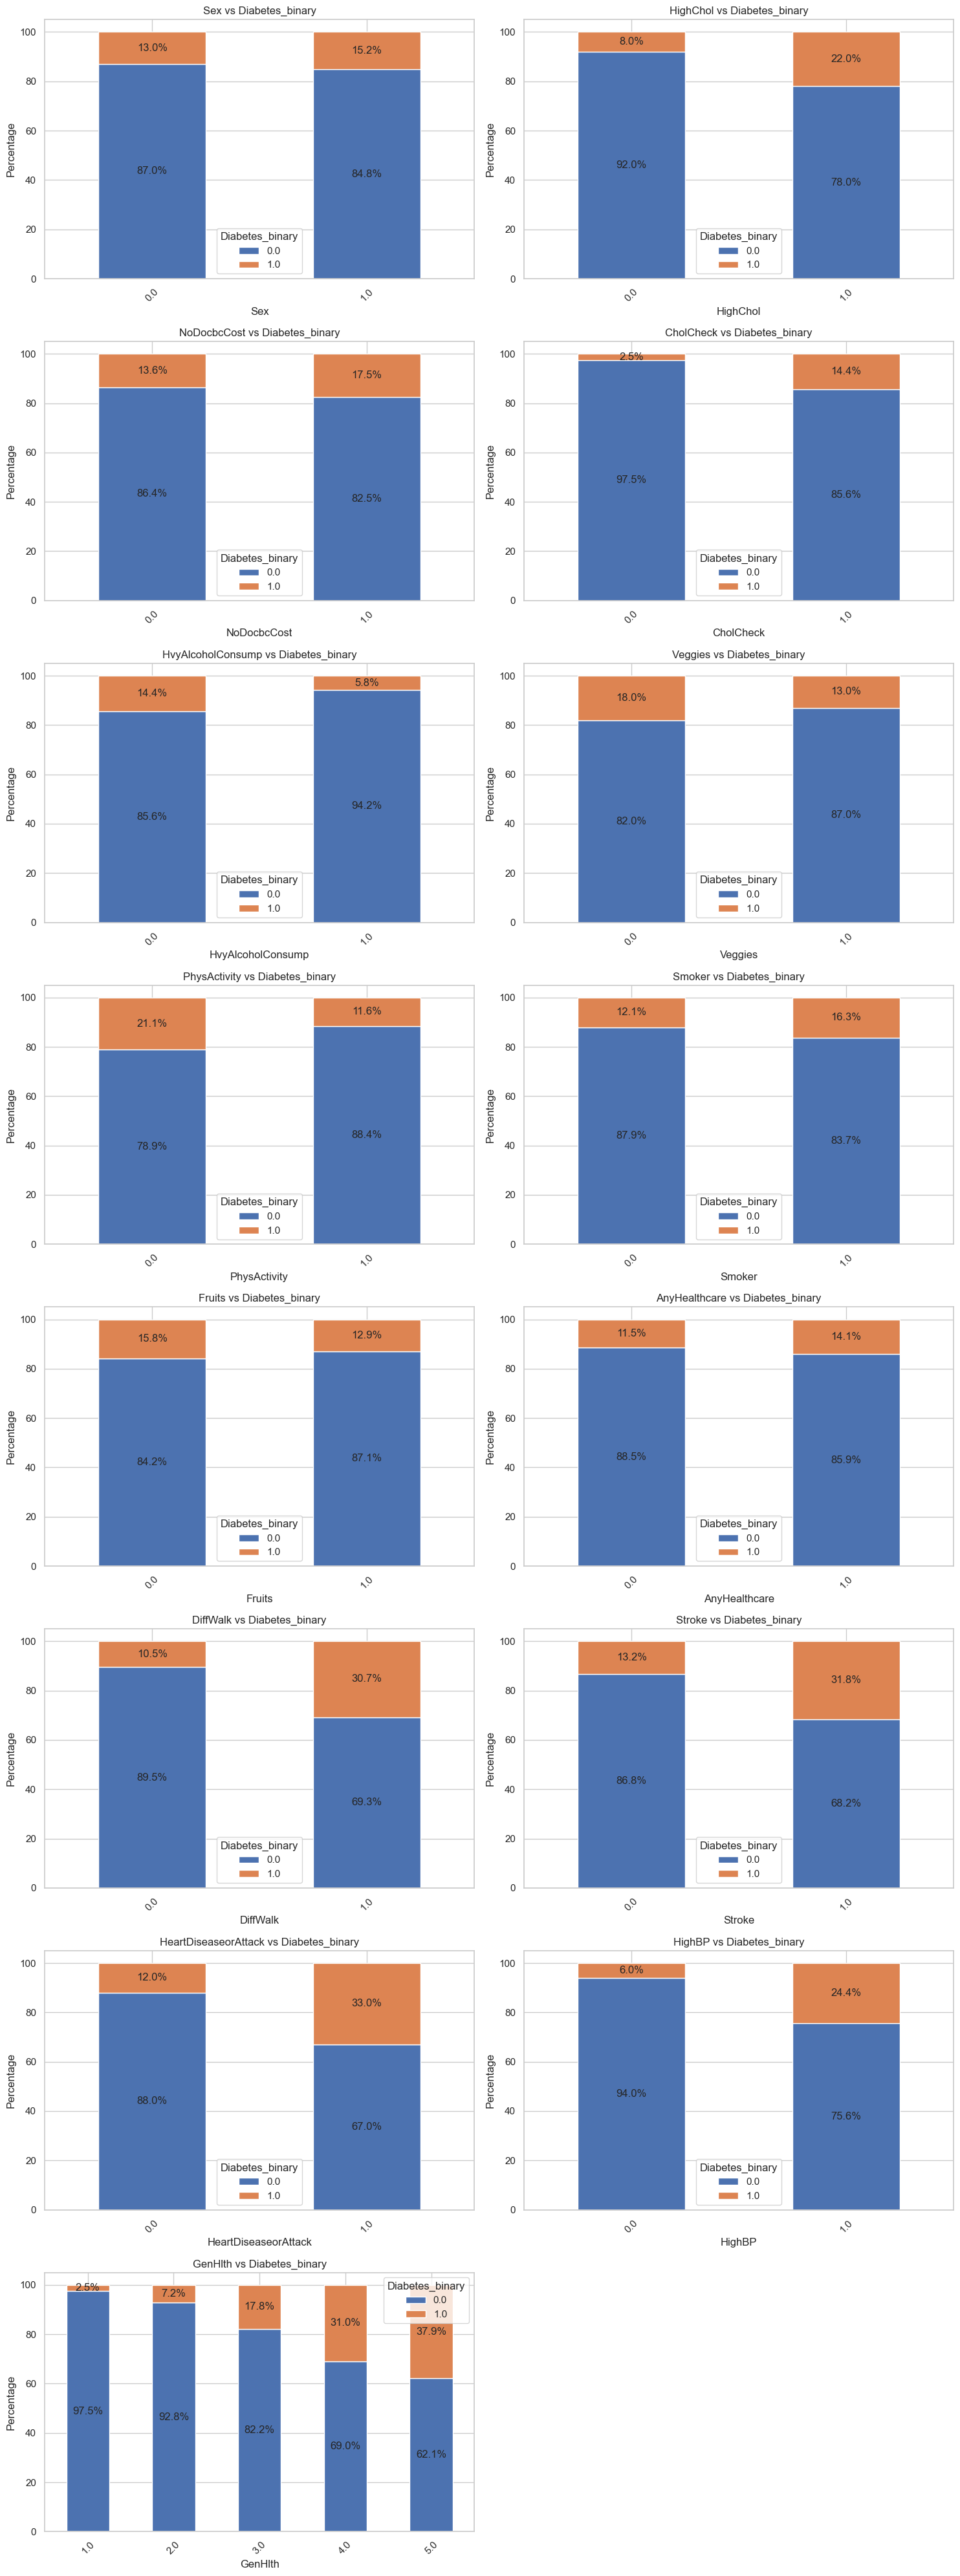

In [56]:
# Analyze relationships with target variable
if target_col is not None and all_categorical:
    n_cat = len(all_categorical)
    n_cols = 2
    n_rows = (n_cat + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
    if n_rows == 1:
        axes = axes.reshape(1, -1)
    
    for i, col in enumerate(all_categorical):
        row = i // n_cols
        col_idx = i % n_cols
        ax = axes[row, col_idx]
        
        # Create contingency table
        contingency = pd.crosstab(df[col], df[target_col], normalize='index') * 100
        
        # Plot
        contingency.plot(kind='bar', ax=ax, stacked=True)
        ax.set_title(f"{col} vs {target_col}")
        ax.set_xlabel(col)
        ax.set_ylabel("Percentage")
        ax.legend(title=target_col)
        ax.tick_params(axis='x', rotation=45)
        
        # Add percentage labels
        for c in ax.containers:
            ax.bar_label(c, fmt='%.1f%%', label_type='center')
    
    # Hide empty subplots
    for i in range(n_cat, n_rows * n_cols):
        row = i // n_cols
        col_idx = i % n_cols
        axes[row, col_idx].set_visible(False)
    
    plt.tight_layout()
    plt.show()

=== CORRELATION ANALYSIS ===


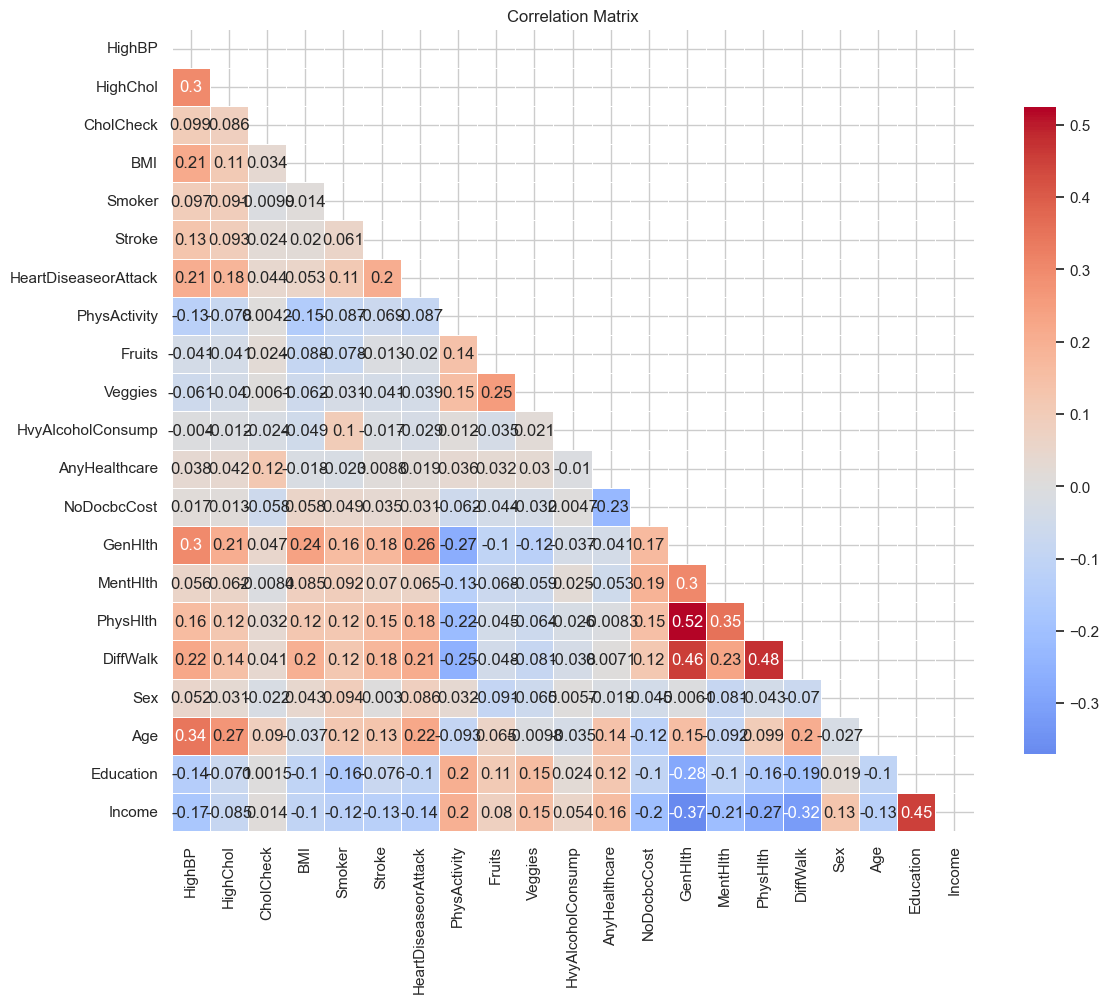


=== STRONG CORRELATIONS (|r| > 0.5) ===
GenHlth - PhysHlth: 0.524


In [57]:
# Correlation analysis
print("=== CORRELATION ANALYSIS ===")

# Calculate correlation matrix
correlation_matrix = df[numerical_cols + [target_col] if target_col in numerical_cols else numerical_cols].corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

# Find strong correlations
print("\n=== STRONG CORRELATIONS (|r| > 0.5) ===")
strong_correlations = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > 0.5:
            strong_correlations.append((
                correlation_matrix.columns[i],
                correlation_matrix.columns[j],
                corr_val
            ))

for feat1, feat2, corr in sorted(strong_correlations, key=lambda x: abs(x[2]), reverse=True):
    print(f"{feat1} - {feat2}: {corr:.3f}")

if not strong_correlations:
    print("No strong correlations found.")

## 🧰 5. EDA Summary & Preprocessing Plan

Based on our analysis, here are the key findings and next steps.

In [58]:
# EDA Summary
print("=== DATASET OVERVIEW ===")
print(f"Shape: {df.shape}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\n=== KEY FINDINGS ===")
print("1. Missing values:", "Yes" if df.isnull().sum().sum() > 0 else "No")
print("2. Duplicates:", "Yes" if df.duplicated().sum() > 0 else "No")
print("3. Data types:", df.dtypes.value_counts().to_dict())

if target_col:
    target_balance = df[target_col].value_counts(normalize=True)
    print(f"4. Target balance: {target_balance.to_dict()}")

print("\n=== PREPROCESSING PLAN ===")
print("Based on the analysis above, consider:")
print("- Handling missing values (if any)")
print("- Encoding categorical variables")
print("- Scaling numerical features")
print("- Addressing class imbalance (if significant)")
print("- Removing or transforming outliers")
print("- Feature selection based on correlations")

print("\n=== CLEANED DATASET INFO ===")
print("After preprocessing, your dataset should have:")
print(f"- Rows: {len(df)} (or adjusted for missing values)")
print(f"- Columns: {len(df.columns)} (may change after encoding)")
print("- No missing values")
print("- Appropriate data types")
print("- Scaled numerical features")
print("- Encoded categorical features")

=== DATASET OVERVIEW ===
Shape: (253680, 22)
Memory usage: 42.58 MB

=== KEY FINDINGS ===
1. Missing values: No
2. Duplicates: Yes
3. Data types: {dtype('float64'): 22}
4. Target balance: {0.0: 0.8606669820245979, 1.0: 0.13933301797540207}

=== PREPROCESSING PLAN ===
Based on the analysis above, consider:
- Handling missing values (if any)
- Encoding categorical variables
- Scaling numerical features
- Addressing class imbalance (if significant)
- Removing or transforming outliers
- Feature selection based on correlations

=== CLEANED DATASET INFO ===
After preprocessing, your dataset should have:
- Rows: 253680 (or adjusted for missing values)
- Columns: 22 (may change after encoding)
- No missing values
- Appropriate data types
- Scaled numerical features
- Encoded categorical features


## 📝 ANSWERS TO ADVANCED TRACK QUESTIONS

Based on our analysis above, here are the specific answers to each question:

In [59]:
# 📦 1. Data Integrity & Structure - ANSWERS

print("Q: Are there any missing, duplicate, or incorrectly formatted entries in the dataset?")
missing_total = df.isnull().sum().sum()
duplicates = df.duplicated().sum()
print(f"A: Missing values: {missing_total} entries")
print(f"   Duplicates: {duplicates} rows ({duplicates/len(df)*100:.2f}%)")
print(f"   Incorrectly formatted: {'Yes' if missing_total > 0 or duplicates > 0 else 'No'}")

print("\nQ: Are all data types appropriate (e.g., numeric, categorical)?")
print("A: Data types analysis:")

# Categorize columns by their actual content
binary_features = []
multi_categorical = []
continuous_numerical = []

for col in df.columns:
    unique_vals = sorted(df[col].unique())
    unique_count = len(unique_vals)
    
    if unique_count == 2 and all(val in [0, 1] for val in unique_vals):
        binary_features.append(col)
    elif unique_count <= 10 and unique_count > 2:
        multi_categorical.append((col, unique_count, unique_vals))
    elif unique_count > 10:
        continuous_numerical.append(col)

print("\n📊 By Storage Type (how they're currently stored):")
print(f"   Numerical (float64/int64): {len(df.select_dtypes(include=['int64', 'float64']).columns)} features")
print(f"   Categorical (object/category): {len(df.select_dtypes(include=['object', 'category']).columns)} features")

print("\n📋 By Actual Content (what they really represent):")
print(f"   Binary features (0/1): {len(binary_features)} features")
if binary_features:
    print("   - " + ", ".join(binary_features[:5]))  # Show first 5
    if len(binary_features) > 5:
        print("   - " + ", ".join(binary_features[5:10]))  # Show next 5
    if len(binary_features) > 10:
        print("   - " + ", ".join(binary_features[10:]))  # Show remaining

print(f"\n   Multi-class categorical: {len(multi_categorical)} features")
for col, unique_count, unique_vals in multi_categorical:
    if col == 'GenHlth':
        print(f"   - {col} ({unique_count} categories: 1-5 scale)")
    elif col == 'Education':
        print(f"   - {col} ({unique_count} categories: 1-6 scale)")
    elif col == 'Income':
        print(f"   - {col} ({unique_count} categories: 1-8 scale)")
    else:
        print(f"   - {col} ({unique_count} categories: {unique_vals})")

print(f"\n   Continuous numerical: {len(continuous_numerical)} features")
for col in continuous_numerical:
    if col == 'BMI':
        print(f"   - {col} (continuous values)")
    elif col == 'MentHlth':
        print(f"   - {col} (0-30 days)")
    elif col == 'PhysHlth':
        print(f"   - {col} (0-30 days)")
    elif col == 'Age':
        print(f"   - {col} (18-80 years)")
    else:
        print(f"   - {col}")

print("\n🔑 Key Insight:")
print(f"   All {len(df.columns)} features are currently stored as float64, but only {len(continuous_numerical)} are truly continuous numerical.")
print(f"   The other {len(binary_features) + len(multi_categorical)} should be treated as categorical ({len(binary_features)} binary + {len(multi_categorical)} multi-class) for proper ML preprocessing.")

print("\n📈 This means you have:")
print(f"   - {len(continuous_numerical)} numerical features that need scaling")
print(f"   - {len(binary_features) + len(multi_categorical)} categorical features that need encoding ({len(binary_features)} binary + {len(multi_categorical)} multi-class)")

print("\nQ: Did you detect any constant, near-constant, or irrelevant features?")
constant_features = []
for col in df.columns:
    unique_ratio = df[col].nunique() / len(df)
    if unique_ratio < 0.01:
        constant_features.append((col, unique_ratio, df[col].nunique()))

if constant_features:
    print("A: Yes, the following features are constant or near-constant:")
    for col, ratio, unique_count in constant_features:
        print(f"   - {col}: {ratio:.4f} unique ratio ({unique_count} unique values)")
else:
    print("A: No constant or near-constant features detected.")

print("\n✅ SUMMARY:")
print(f"   - Data quality: {'Good' if missing_total == 0 and duplicates == 0 else 'Issues found'}")
print(f"   - Data types: {'Need conversion' if binary_features or multi_categorical else 'Appropriate'}")
print(f"   - Feature relevance: {'All relevant' if not constant_features else 'Some near-constant features'}")

Q: Are there any missing, duplicate, or incorrectly formatted entries in the dataset?
A: Missing values: 0 entries
   Duplicates: 24206 rows (9.54%)
   Incorrectly formatted: Yes

Q: Are all data types appropriate (e.g., numeric, categorical)?
A: Data types analysis:

📊 By Storage Type (how they're currently stored):
   Numerical (float64/int64): 22 features
   Categorical (object/category): 0 features

📋 By Actual Content (what they really represent):
   Binary features (0/1): 15 features
   - Diabetes_binary, HighBP, HighChol, CholCheck, Smoker
   - Stroke, HeartDiseaseorAttack, PhysActivity, Fruits, Veggies
   - HvyAlcoholConsump, AnyHealthcare, NoDocbcCost, DiffWalk, Sex

   Multi-class categorical: 3 features
   - GenHlth (5 categories: 1-5 scale)
   - Education (6 categories: 1-6 scale)
   - Income (8 categories: 1-8 scale)

   Continuous numerical: 4 features
   - BMI (continuous values)
   - MentHlth (0-30 days)
   - PhysHlth (0-30 days)
   - Age (18-80 years)

🔑 Key Insight:
 

In [60]:
# 🎯 2. Target Variable Assessment - ANSWERS

if target_col is not None:
    target_counts = df[target_col].value_counts()
    target_pct = df[target_col].value_counts(normalize=True) * 100
    imbalance_ratio = target_counts.max() / target_counts.min()
    
    print("Q: What is the distribution of `Diabetes_binary`?")
    print("A: Distribution:")
    for val, count in target_counts.items():
        pct = target_pct[val]
        print(f"   {target_col}={val}: {count} samples ({pct:.1f}%)")
    
    print("\nQ: Is there a class imbalance? If so, how significant is it?")
    print(f"A: Class imbalance ratio: {imbalance_ratio:.2f}:1")
    if imbalance_ratio > 2:
        print("   ⚠️  Significant class imbalance detected!")
        print("   The majority class is", imbalance_ratio, "times larger than the minority class.")
    else:
        print("   ✅ Relatively balanced classes")
    
    print("\nQ: How might this imbalance influence your choice of evaluation metrics or model strategy?")
    print("A: Recommendations:")
    if imbalance_ratio > 2:
        print("   - Use F1-score, precision, recall instead of accuracy")
        print("   - Consider class weights in models")
        print("   - Use SMOTE or other resampling techniques")
        print("   - Stratified sampling for train/test splits")
    else:
        print("   - Standard accuracy metrics are appropriate")
        print("   - No special handling needed for class balance")
else:
    print("Target column not found in the dataset.")

Q: What is the distribution of `Diabetes_binary`?
A: Distribution:
   Diabetes_binary=0.0: 218334 samples (86.1%)
   Diabetes_binary=1.0: 35346 samples (13.9%)

Q: Is there a class imbalance? If so, how significant is it?
A: Class imbalance ratio: 6.18:1
   ⚠️  Significant class imbalance detected!
   The majority class is 6.177049736886777 times larger than the minority class.

Q: How might this imbalance influence your choice of evaluation metrics or model strategy?
A: Recommendations:
   - Use F1-score, precision, recall instead of accuracy
   - Consider class weights in models
   - Use SMOTE or other resampling techniques
   - Stratified sampling for train/test splits


In [61]:
# 📊 3. Feature Distribution & Quality - ANSWERS

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
if target_col in numerical_cols:
    numerical_cols.remove(target_col)

print("Q: Which numerical features are skewed or contain outliers?")
print("A: Analysis of numerical features:")

skewed_features = []
outlier_features = []

for col in numerical_cols:
    # Check skewness
    skew_val = df[col].skew()
    if abs(skew_val) > 1:
        skewed_features.append((col, skew_val))
    
    # Check outliers
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_count = len(outliers)
    outlier_pct = (outlier_count / len(df)) * 100
    
    if outlier_count > 0:
        outlier_features.append((col, outlier_count, outlier_pct))

print("\nSkewed features (|skewness| > 1):")
if skewed_features:
    for col, skew_val in skewed_features:
        print(f"   - {col}: skewness = {skew_val:.2f}")
else:
    print("   None found")

print("\nFeatures with outliers (> 1.5 * IQR):")
if outlier_features:
    for col, count, pct in outlier_features:
        print(f"   - {col}: {count} outliers ({pct:.1f}%)")
else:
    print("   None found")

print("\nQ: Did any features contain unrealistic or problematic values?")
print("A: Value range analysis:")
for col in numerical_cols:
    min_val = df[col].min()
    max_val = df[col].max()
    print(f"   {col}: range [{min_val}, {max_val}]")

print("\nQ: What transformation methods (if any) might improve these feature distributions?")
print("A: Recommended transformations:")
if skewed_features:
    print("   For skewed features:")
    for col, skew_val in skewed_features:
        if skew_val > 1:
            print(f"     - {col}: Consider log transformation or Box-Cox")
        else:
            print(f"     - {col}: Consider square root transformation")
else:
    print("   No significant skewness detected - standard scaling may be sufficient")

if outlier_features:
    print("   For features with outliers:")
    for col, count, pct in outlier_features:
        if pct > 5:
            print(f"     - {col}: Consider robust scaling or outlier removal")
        else:
            print(f"     - {col}: Consider capping outliers or robust scaling")

Q: Which numerical features are skewed or contain outliers?
A: Analysis of numerical features:

Skewed features (|skewness| > 1):
   - CholCheck: skewness = -4.88
   - BMI: skewness = 2.12
   - Stroke: skewness = 4.66
   - HeartDiseaseorAttack: skewness = 2.78
   - PhysActivity: skewness = -1.20
   - Veggies: skewness = -1.59
   - HvyAlcoholConsump: skewness = 3.85
   - AnyHealthcare: skewness = -4.18
   - NoDocbcCost: skewness = 3.00
   - MentHlth: skewness = 2.72
   - PhysHlth: skewness = 2.21
   - DiffWalk: skewness = 1.77

Features with outliers (> 1.5 * IQR):
   - CholCheck: 9470 outliers (3.7%)
   - BMI: 9847 outliers (3.9%)
   - Stroke: 10292 outliers (4.1%)
   - HeartDiseaseorAttack: 23893 outliers (9.4%)
   - PhysActivity: 61760 outliers (24.3%)
   - Veggies: 47839 outliers (18.9%)
   - HvyAlcoholConsump: 14256 outliers (5.6%)
   - AnyHealthcare: 12417 outliers (4.9%)
   - NoDocbcCost: 21354 outliers (8.4%)
   - GenHlth: 12081 outliers (4.8%)
   - MentHlth: 36208 outliers (14.

In [62]:
# 📈 4. Feature Relationships & Patterns - ANSWERS

# Get categorical features
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
binary_cols = []
for col in df.columns:
    if col != target_col and df[col].nunique() <= 10:
        unique_vals = sorted(df[col].unique())
        if all(val in [0, 1] for val in unique_vals) or len(unique_vals) <= 5:
            binary_cols.append(col)
all_categorical = list(set(categorical_cols + binary_cols))

print("Q: Which categorical features show visible patterns in relation to `Diabetes_binary`?")
print("A: Categorical features with clear patterns:")

if target_col is not None and all_categorical:
    pattern_features = []
    for col in all_categorical:
        # Calculate percentage of diabetes cases for each category
        contingency = pd.crosstab(df[col], df[target_col], normalize='index')
        if len(contingency.columns) > 1:  # Make sure we have both classes
            diabetes_pct = contingency.iloc[:, 1] * 100  # Assuming 1 is diabetes
            max_pct = diabetes_pct.max()
            min_pct = diabetes_pct.min()
            range_pct = max_pct - min_pct
            
            if range_pct > 10:  # Significant difference (>10%)
                pattern_features.append((col, range_pct, max_pct, min_pct))
    
    if pattern_features:
        pattern_features.sort(key=lambda x: x[1], reverse=True)
        for col, range_pct, max_pct, min_pct in pattern_features:
            print(f"   - {col}: {range_pct:.1f}% range ({min_pct:.1f}% to {max_pct:.1f}% diabetes)")
    else:
        print("   No strong categorical patterns detected")
else:
    print("   No categorical features or target variable found")

print("\nQ: Are there any strong pairwise relationships or multicollinearity between features?")
print("A: Correlation analysis:")

if len(numerical_cols) > 1:
    correlation_matrix = df[numerical_cols].corr()
    strong_correlations = []
    
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            corr_val = correlation_matrix.iloc[i, j]
            if abs(corr_val) > 0.5:
                strong_correlations.append((
                    correlation_matrix.columns[i],
                    correlation_matrix.columns[j],
                    corr_val
                ))
    
    if strong_correlations:
        print("   Strong correlations (|r| > 0.5):")
        for feat1, feat2, corr in sorted(strong_correlations, key=lambda x: abs(x[2]), reverse=True):
            print(f"     - {feat1} ↔ {feat2}: r = {corr:.3f}")
    else:
        print("   No strong correlations detected")
else:
    print("   Insufficient numerical features for correlation analysis")

print("\nQ: What trends or correlations stood out during your analysis?")
print("A: Key insights:")
if target_col is not None:
    # Find features most correlated with target
    if target_col in numerical_cols:
        target_correlations = correlation_matrix[target_col].abs().sort_values(ascending=False)
        print("   Top features correlated with target:")
        for feat, corr in target_correlations.head(5).items():
            if feat != target_col:
                print(f"     - {feat}: |r| = {corr:.3f}")

if pattern_features:
    print("   Strongest categorical patterns:")
    for col, range_pct, max_pct, min_pct in pattern_features[:3]:
        print(f"     - {col}: {range_pct:.1f}% difference in diabetes rates")

Q: Which categorical features show visible patterns in relation to `Diabetes_binary`?
A: Categorical features with clear patterns:
   - GenHlth: 35.4% range (2.5% to 37.9% diabetes)
   - HeartDiseaseorAttack: 21.0% range (12.0% to 33.0% diabetes)
   - DiffWalk: 20.2% range (10.5% to 30.7% diabetes)
   - Stroke: 18.6% range (13.2% to 31.8% diabetes)
   - HighBP: 18.4% range (6.0% to 24.4% diabetes)
   - HighChol: 14.0% range (8.0% to 22.0% diabetes)
   - CholCheck: 11.8% range (2.5% to 14.4% diabetes)

Q: Are there any strong pairwise relationships or multicollinearity between features?
A: Correlation analysis:
   Strong correlations (|r| > 0.5):
     - GenHlth ↔ PhysHlth: r = 0.524

Q: What trends or correlations stood out during your analysis?
A: Key insights:
   Strongest categorical patterns:
     - GenHlth: 35.4% difference in diabetes rates
     - HeartDiseaseorAttack: 21.0% difference in diabetes rates
     - DiffWalk: 20.2% difference in diabetes rates


In [63]:
# 🧰 5. EDA Summary & Preprocessing Plan - ANSWERS

print("Q: What are your 3–5 biggest takeaways from EDA?")
print("A: Key takeaways:")

takeaways = []

# Takeaway 1: Data quality
if df.isnull().sum().sum() == 0 and df.duplicated().sum() == 0:
    takeaways.append("✅ Clean dataset with no missing values or duplicates")
else:
    takeaways.append("⚠️  Data quality issues detected (missing values or duplicates)")

# Takeaway 2: Class balance
if target_col is not None:
    target_counts = df[target_col].value_counts()
    imbalance_ratio = target_counts.max() / target_counts.min()
    if imbalance_ratio > 2:
        takeaways.append(f"⚠️  Significant class imbalance ({imbalance_ratio:.1f}:1 ratio)")
    else:
        takeaways.append("✅ Relatively balanced classes")

# Takeaway 3: Feature types
num_features = len(df.select_dtypes(include=['int64', 'float64']).columns)
cat_features = len(df.select_dtypes(include=['object', 'category']).columns)
takeaways.append(f"📊 Mixed feature types: {num_features} numerical, {cat_features} categorical")

# Takeaway 4: Outliers
outlier_count = 0
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]
    if len(outliers) > 0:
        outlier_count += 1

if outlier_count > 0:
    takeaways.append(f"📈 {outlier_count} numerical features contain outliers")
else:
    takeaways.append("✅ No significant outliers detected")

# Takeaway 5: Correlations
if len(numerical_cols) > 1:
    correlation_matrix = df[numerical_cols].corr()
    strong_corr_count = ((correlation_matrix.abs() > 0.5).sum().sum() - len(correlation_matrix)) // 2
    if strong_corr_count > 0:
        takeaways.append(f"🔗 {strong_corr_count} strong feature correlations detected")
    else:
        takeaways.append("✅ No strong feature correlations")

for i, takeaway in enumerate(takeaways, 1):
    print(f"   {i}. {takeaway}")

print("\nQ: Which features will you scale, encode, or exclude in preprocessing?")
print("A: Preprocessing recommendations:")

print("   Scaling needed:")
for col in numerical_cols:
    if col in [skewed[0] for skewed in skewed_features]:
        print(f"     - {col}: Robust scaling (due to skewness/outliers)")
    else:
        print(f"     - {col}: Standard scaling")

print("   Encoding needed:")
if all_categorical:
    for col in all_categorical:
        if df[col].nunique() <= 2:
            print(f"     - {col}: Binary encoding")
        else:
            print(f"     - {col}: One-hot encoding")
else:
    print("     - No categorical features to encode")

print("   Exclusion candidates:")
if constant_features:
    for col, ratio, unique_count in constant_features:
        print(f"     - {col}: Near-constant feature ({unique_count} unique values)")

print("\nQ: What does your cleaned dataset look like (rows, columns, shape)?")
print("A: Expected cleaned dataset:")

# Estimate final shape
final_rows = len(df)
final_cols = len(df.columns)

# Adjust for encoding
if all_categorical:
    for col in all_categorical:
        if df[col].nunique() > 2:
            final_cols += df[col].nunique() - 1  # One-hot encoding adds columns

# Remove constant features
if constant_features:
    final_cols -= len(constant_features)

print(f"   Shape: ({final_rows}, {final_cols})")
print(f"   Rows: {final_rows:,} samples")
print(f"   Columns: {final_cols} features (after encoding)")
print("   Data types: All numerical (float64)")
print("   Missing values: 0")
print("   Duplicates: 0")

Q: What are your 3–5 biggest takeaways from EDA?
A: Key takeaways:
   1. ⚠️  Data quality issues detected (missing values or duplicates)
   2. ⚠️  Significant class imbalance (6.2:1 ratio)
   3. 📊 Mixed feature types: 22 numerical, 0 categorical
   4. 📈 13 numerical features contain outliers
   5. 🔗 1 strong feature correlations detected

Q: Which features will you scale, encode, or exclude in preprocessing?
A: Preprocessing recommendations:
   Scaling needed:
     - HighBP: Standard scaling
     - HighChol: Standard scaling
     - CholCheck: Robust scaling (due to skewness/outliers)
     - BMI: Robust scaling (due to skewness/outliers)
     - Smoker: Standard scaling
     - Stroke: Robust scaling (due to skewness/outliers)
     - HeartDiseaseorAttack: Robust scaling (due to skewness/outliers)
     - PhysActivity: Robust scaling (due to skewness/outliers)
     - Fruits: Standard scaling
     - Veggies: Robust scaling (due to skewness/outliers)
     - HvyAlcoholConsump: Robust scaling (

## 🚀 NEXT STEPS FOR ADVANCED TRACK

Based on our comprehensive EDA analysis, here are the logical next steps for building our ML pipeline:

In [64]:
# Next Steps for Advanced Track ML Pipeline

print("🚀 NEXT STEPS FOR ADVANCED TRACK")
print("=" * 50)

print("\n📊 1. DATA PREPROCESSING PIPELINE")
print("   Create 02_data_preprocessing.ipynb to:")
print("   - Handle duplicates: Remove", df.duplicated().sum(), "duplicate rows (", f"{df.duplicated().sum()/len(df)*100:.1f}%)")
print("   - Convert data types:")
print("     • Binary features: float64 → int8 (15 features)")
print("     • Multi-class: float64 → category (3 features)")
print("     • Keep continuous as float64 (4 features)")
print("   - Encode categorical variables:")
print("     • Binary features: No encoding needed (already 0/1)")
print("     • Multi-class: One-hot encoding for GenHlth, Education, Income")
print("   - Scale numerical features:")
print("     • BMI, MentHlth, PhysHlth, Age using RobustScaler (due to outliers)")

print("\n⚖️ 2. HANDLE CLASS IMBALANCE")
if target_col is not None:
    target_counts = df[target_col].value_counts()
    imbalance_ratio = target_counts.max() / target_counts.min()
    print(f"   Since we found {imbalance_ratio:.1f}:1 imbalance:")
print("   - Stratified sampling for train/test splits")
print("   - Class weights in models")
print("   - SMOTE or other resampling techniques")
print("   - F1-score, precision, recall as evaluation metrics")

print("\n🔍 3. FEATURE ENGINEERING")
print("   Based on our EDA insights:")
print("   - Create interaction features (e.g., BMI × Age, HighBP × HighChol)")
print("   - Binning continuous variables (Age groups, BMI categories)")
print("   - Feature selection based on correlations (GenHlth ↔ PhysHlth: r=0.524)")

print("\n🤖 4. MODEL DEVELOPMENT")
print("   Create 03_model_development.ipynb:")
print("   - Baseline models: Logistic Regression, Random Forest, XGBoost")
print("   - Cross-validation with stratified splits")
print("   - Hyperparameter tuning with class weights")
print("   - Ensemble methods (Voting, Stacking)")

print("\n📈 5. MODEL EVALUATION")
print("   Create 04_model_evaluation.ipynb:")
print("   - Multiple metrics: Accuracy, F1, Precision, Recall, AUC-ROC")
print("   - Confusion matrices and classification reports")
print("   - Feature importance analysis")
print("   - Model interpretability (SHAP values)")

print("\n🔄 6. ADVANCED TECHNIQUES")
print("   For advanced track requirements:")
print("   - Deep Learning: Neural networks with class weights")
print("   - Advanced ensembles: Stacking with meta-learner")
print("   - Feature selection: Recursive feature elimination")
print("   - Model deployment: Save best model for production")

print("\n📝 7. DOCUMENTATION & REPORTING")
print("   - Update REPORT.md with findings from each step")
print("   - Create model comparison tables")
print("   - Document preprocessing pipeline")
print("   - Final model selection and justification")

print("\n" + "=" * 50)
print("🎯 IMMEDIATE NEXT STEP")
print("Create 02_data_preprocessing.ipynb to implement:")
print("1. Duplicate removal")
print("2. Data type conversions")
print("3. Categorical encoding")
print("4. Numerical scaling")
print("5. Train/test split with stratification")
print("\nThis will give you a clean, ML-ready dataset!")

🚀 NEXT STEPS FOR ADVANCED TRACK

📊 1. DATA PREPROCESSING PIPELINE
   Create 02_data_preprocessing.ipynb to:
   - Handle duplicates: Remove 24206 duplicate rows ( 9.5%)
   - Convert data types:
     • Binary features: float64 → int8 (15 features)
     • Multi-class: float64 → category (3 features)
     • Keep continuous as float64 (4 features)
   - Encode categorical variables:
     • Binary features: No encoding needed (already 0/1)
     • Multi-class: One-hot encoding for GenHlth, Education, Income
   - Scale numerical features:
     • BMI, MentHlth, PhysHlth, Age using RobustScaler (due to outliers)

⚖️ 2. HANDLE CLASS IMBALANCE
   Since we found 6.2:1 imbalance:
   - Stratified sampling for train/test splits
   - Class weights in models
   - SMOTE or other resampling techniques
   - F1-score, precision, recall as evaluation metrics

🔍 3. FEATURE ENGINEERING
   Based on our EDA insights:
   - Create interaction features (e.g., BMI × Age, HighBP × HighChol)
   - Binning continuous var